In [201]:
import pandas as pd
import numpy

In [202]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [203]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Impute missing values for 'bmi' using the median
imputer = SimpleImputer(strategy='median')
data['bmi'] = imputer.fit_transform(data[['bmi']])

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Display the cleaned dataset summary
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


(None,
       id  gender   age  hypertension  heart_disease  ever_married  work_type  \
 0   9046       1  67.0             0              1             1          2   
 1  51676       0  61.0             0              0             1          3   
 2  31112       1  80.0             0              1             1          2   
 3  60182       0  49.0             0              0             1          2   
 4   1665       0  79.0             1              0             1          3   
 
    Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
 0               1             228.69  36.6               1       1  
 1               0             202.21  28.1               2       1  
 2               0             105.92  32.5               2       1  
 3               1             171.23  34.4               3       1  
 4               0             174.12  24.0               2       1  )

In [204]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [205]:
X = data.drop('id', axis = 1)

In [206]:
X[:1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1


In [207]:
y = data['stroke']

In [208]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4088, 11), (1022, 11), (4088,), (1022,))

In [210]:
import torch
from torch import nn

In [211]:
y_train.dtype

dtype('int64')

In [212]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [213]:
device 

'cuda'

In [214]:
y_test.dtype

dtype('int64')

In [215]:
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)

In [216]:
X_test[:1]

tensor([[ 1.1876,  0.8696, -0.3280, -0.2391,  0.7170, -0.1611, -1.0123, -0.6207,
          0.7616,  0.5892, -0.2262]], dtype=torch.float64)

In [217]:
y_train.dtype

torch.int64

In [218]:
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

In [219]:
X_train.shape

torch.Size([4088, 11])

In [263]:
class BaseLineModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.LinearBlock1 = nn.Sequential(
            nn.Linear(in_features = 11,
                      out_features = 32),
            nn.Linear(in_features = 32,
                      out_features = 32),
            nn.ReLU()
        )
        self.LinearBlock2 = nn.Sequential(
            nn.Linear(in_features = 32,
                      out_features = 16),
            nn.Linear(in_features = 16,
                      out_features = 1),
            nn.ReLU()
        )

    def forward(self, x):
        """
        x = self.LinearBlock1(x)
        print(x)
        x = self.LinearBlock2(x)
        print(x)
        """
        return self.LinearBlock2(self.LinearBlock1(x))


model0 = BaseLineModel().to(device)

In [264]:
model0

BaseLineModel(
  (LinearBlock1): Sequential(
    (0): Linear(in_features=11, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): ReLU()
  )
  (LinearBlock2): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=1, bias=True)
    (2): ReLU()
  )
)

In [265]:
from torchinfo import summary

In [266]:
summary(model0)

Layer (type:depth-idx)                   Param #
BaseLineModel                            --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       384
│    └─Linear: 2-2                       1,056
│    └─ReLU: 2-3                         --
├─Sequential: 1-2                        --
│    └─Linear: 2-4                       528
│    └─Linear: 2-5                       17
│    └─ReLU: 2-6                         --
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0

In [267]:
dummy_x = X_train[:1].to(device).to(torch.float32)

In [268]:
dummy_x

tensor([[-0.8403,  0.2057, -0.3280, -0.2391,  0.7170, -0.1611,  0.9878, -0.8200,
          0.5426,  0.5892, -0.2262]], device='cuda:0')

In [269]:
X_train.dtype

torch.float32

In [270]:
X_train = X_train.to(torch.float32)
X_test = X_test.to(torch.float32)
y_test = y_test.to(torch.float32)
y_train = y_train.to(torch.float32)

In [271]:
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

torch.float32
torch.float32
torch.float32
torch.float32


In [272]:
import torch
dummy_y = torch.softmax(model0(dummy_x), 0)
dummy_y.dtype

torch.float32

In [273]:
negs = (y_train == 0).sum()
pos = (y_train == 1).sum()
weight = torch.tensor(negs / pos).to(device)
weight = torch.tensor([10]).to(device)
loss_fn = nn.BCEWithLogitsLoss(pos_weight = weight)
optimizer = torch.optim.SGD(lr = 0.0001,
                            params = model0.parameters())


def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


/tmp/ipykernel_6389/3757901959.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weight = torch.tensor(negs / pos).to(device)


In [ ]:
EPOCHS = 10000
test_loss_val = []
train_loss_val = []
test_acc_val = []
train_acc_val = []
epoch_count = []
model0.to(device)
for epoch in range(EPOCHS):
    model0.train()
    X_train, y_train = X_train.to(device), y_train.to(device)
    y_logits = model0(X_train).squeeze(1)
    y_pred = torch.sigmoid(y_logits).round()
    #print(y_logits.shape)
    
    train_loss = loss_fn(y_logits, y_train)
    
    train_acc = accuracy_fn(y_train, y_logits)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    #Evaluating model
    model0.eval()
    X_test, y_test = X_test.to(device), y_test.to(device)
    with torch.inference_mode():
        test_logits = model0(X_test).squeeze(1)
        test_preds = torch.sigmoid(test_logits).round()

        test_loss = loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(y_test, test_logits)

        if epoch % 1000 == 0:
            epoch_count.append(epoch)
            test_loss_val.append(test_loss)
            test_acc_val.append(test_acc)
            train_loss_val.append(train_loss)
            train_acc_val.append(train_acc)
            print(f"Epoch: {epoch} | Train acc: {train_acc: .2f}% | Train loss: {train_loss: .4f} | Test acc: {test_acc: .2f}% | Test loss: {test_loss: .4f}")

            
        
    

    


    

Epoch: 0 | Train acc:  95.06% | Train loss:  0.9969 | Test acc:  95.11% | Test loss:  0.9983
Epoch: 1000 | Train acc:  95.06% | Train loss:  0.9969 | Test acc:  95.11% | Test loss:  0.9983
Epoch: 2000 | Train acc:  95.06% | Train loss:  0.9969 | Test acc:  95.11% | Test loss:  0.9983
Epoch: 3000 | Train acc:  95.06% | Train loss:  0.9969 | Test acc:  95.11% | Test loss:  0.9983


In [259]:
import numpy as np
eval_preds = []
y_true = []

X_test, y_test = X_test.to('cpu'), y_test.to('cpu')
model0.to('cpu')
model0.eval()
with torch.inference_mode():
    eval_logits = model0(X_test).squeeze(1)
    eval_pred = torch.sigmoid(eval_logits).round()

    eval_preds.append(eval_pred)
    y_true.append(y_test)
    y_pred_np = torch.cat(eval_preds).numpy()
    y_true_np = torch.cat(y_true).numpy()


In [260]:
y_pred_np

array([0., 0., 0., ..., 1., 0., 0.], shape=(1022,), dtype=float32)

In [261]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_true_np, y_pred_np)

# Optional: Define class names
class_names = ['0', '1']

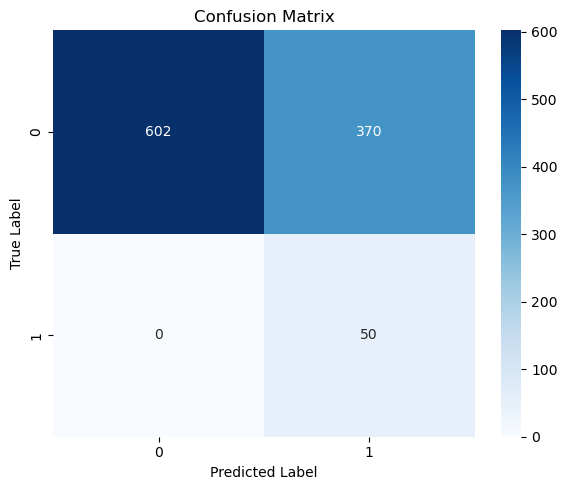

In [262]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()